# Testing a base model

Currently i've chosen keras, as it would be quick to try things out + exam comming up (using keras) on 13th of January

In [1]:
%pip install scikit-learn keras 'tensorflow[and-cuda]' opencv-python python-dotenv pandas sqlalchemy PyMySQL matplotlib scikit-image 
#imgaugP

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

2025-03-14 13:54:55.083420: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-14 13:54:55.103266: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741956895.121621   57054 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741956895.125862   57054 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-14 13:54:55.138097: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import keras
import numpy as np
import pandas as pd
import sys

In [4]:
from FrameLoader import FrameLoader
from DataRepository import DataRepository
from DataGeneratorSegmentation import DataGeneratorSegmentation
from helpers import plot

In [5]:
import os
import psutil

def process_memory():
    "Returns megabytes"
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss / 1024 / 1024 / 1024

print(f"Current memory usage: {process_memory()} gigabytes")

Current memory usage: 0.7004890441894531 gigabytes


In [6]:
repo = DataRepository()
frameloader = FrameLoader(repo)
repo.VideoNames.head()

connection established, loading frame paths
rel paths of framelabels loaded


folderId    id                                               name
id                                                                     
2214        16  2214  free-vids/DD3/2011-brewsterbayside-dd3-junsen-...
2215        16  2215  free-vids/DD3/2011-brewsterbayside-dd3-junsen-...
1084         5  1084  competition/belgium/SR1/2011-brewsterbayside-s...
1085         5  1085  competition/belgium/SR1/2011-brewsterbayside-s...
1086         5  1086  competition/belgium/SR1/2011-brewsterbayside-s...

In [7]:
%%time

train_gen = DataGeneratorSegmentation(
    frameloader=frameloader,
    train_test_val="train",
    dim=(224,224),
    batch_size=1
)

connection established, loading frame paths
rel paths of framelabels loaded
DataGeneratorSkills init done
CPU times: user 4.19 s, sys: 175 ms, total: 4.37 s
Wall time: 5.23 s


In [8]:
train_gen.Skills

id  videoId  frameStart  frameEnd  type  rotations  turner1  turner2  \
0       83     1178          91       106     1          1        3        3   
1       84     1178         106       117     1          1        3        3   
2       85     1178         117       132     1          2        2        1   
3       86     1178         132       144     1          2        1        2   
4       87     1178         144       159     1          1        3        3   
...    ...      ...         ...       ...   ...        ...      ...      ...   
2995  3453     1404        2189      2208     1          1        1        2   
2996  3454     1404        2208      2224     1          1        1        1   
2997  3455     1404        2224      2239     1          1        1        1   
2998  3456     1404        2239      2254     1          1        1        1   
2999  3457     1404        2254      2273     1          1        1        1   

      skill  hands  feet  turntable  bodyRotations  backwards  sloppy  \
0         4      2     2          0              0          0       0   
1         2      0     0          0              0          0       0   
2         4      1     2          0              0          0       0   
3         2      0     0          0              0          0       0   
4         4      1     2          0              0          0       0   
...     ...    ...   ...        ...            ...        ...     ...   
2995      4      1     1          0              0          0       0   
2996      2      0     0          0              0          0       0   
2997      1      0     2          0              0          0       0   
2998      1      0     2          0              0          0       0   
2999      1      0     2          0              0          0       0   

      hard2see  fault  labeldate  
0            0      0 2025-02-09  
1            0      0 2025-02-09  
2            0      0 2025-02-09  
3            0      0 2025-02-09  
4            0      0 2025-02-09  
...        ...    ...        ...  
2995         0      0 2025-03-11  
2996         0      0 2025-03-11  
2997         0      0 2025-03-11  
2998         0      0 2025-03-11  
2999         0      0 2025-03-11  

[3000 rows x 18 columns]

In [9]:
train_gen.Videos

id  folderId                                             name  width  \
0    644         3                                 2023-PK-ZO-9.mp4   1920   
1    646         3                                2023-proef-zo.mp4   1920   
2    649         3                                 2023-PK-ZO-6.mp4   1920   
3    650         3                                 2023-PK-ZA-1.mp4   1920   
4    667         3                     2023-PK-ZA-38-3DD-Matthe.mp4   1920   
5    677         3                                 2023-PK-ZO-1.mp4   1920   
6    679         3                                2023-PK-ZO-11.mp4   1920   
7    688         3                                2023-PK-ZO-29.mp4   1920   
8    692         3                       2023-PK-ZO-32-3DD-Sara.mp4   1920   
9   1152         3            2024-dd3-pka-20240225_155532-tblt.mp4   1920   
10  1162         3  2024-dd3-bk-skippies-dd3-senioren-lorena-j1.MP4   1280   
11  1178         3     2024-dd3-bk-recrean-dd3-senioren-jens-z1.mp4   1920   
12  1184         3                  2022-dd3-belgium-prelims-42.mp4   1920   
13  1202         3        2024-dd3-bk-rom-dd3-senioren-mixed-z1.mp4   1920   
14  1206         3      2024-dd3-bk-sipiro-dd3-senioren-luka-j1.MP4   1280   
15  1222         3     2024-dd3-bk-jumpup-dd3-beloften-mixed-z1.mp4   1920   
16  1233         3     2024-dd3-bk-xlrope-dd3-beloften-senne-j1.MP4   1280   
17  1243         3      2024-dd3-bk-moving-dd3-senioren-tijl-j1.MP4   1280   
18  1263         3                   2023-dd3-BK-meisjes-48-DD3.mp4   1920   
19  1268         3               2023-dd3-BK-meisjes-7-DD3-Sara.mp4   1920   
20  1270         3               2023-dd3-BK-mixed-12-DD3-Jelle.mp4   1920   
21  1277         3                 2023-dd3-BK-mixed-30-DD3-Len.mp4   1920   
22  1281         3              2023-dd3-BK-mixed-38-DD3-Xander.mp4   1920   
23  1304         3                   2024-dd3-korea-forces-male.mp4   1280   
24  1348         3          2022-dd3-belgium-grand-nationals-23.mp4   1920   
25  1353         3          2022-dd3-belgium-grand-nationals-28.mp4   1920   
26  1354         3          2022-dd3-belgium-grand-nationals-29.mp4   1920   
27  1396         3               2021-dd3-world-virtual-japan-4.mp4   1920   
28  1404         3          2022-dd3-belgium-grand-nationals-04.mp4   1920   
29  2216         3  2014-dd3-siluskip-pk-ilse-domien-pieter-jan.mp4   1920   

    height      fps  training  obstruction  private  qualitative  frameLength  \
0     1080  30.0000         1            0        1            1         2423   
1     1080  29.9950         1            0        1            1         2468   
2     1080  30.0000         1            0        1            1         2473   
3     1080  29.9990         1            0        1            1         2321   
4     1080  30.0000         1            0        1            1         2332   
5     1080  29.9960         1            0        1            1         2486   
6     1080  30.0030         1            0        1            1         2422   
7     1080  30.0020         1            0        1            1         2411   
8     1080  30.0020         0            0        1            1         2440   
9     1080  30.0120         1            0        1            1         2700   
10     720  25.0000         1            0        1            1         1995   
11    1080  25.0000         1            0        1            1         1944   
12    1080  29.9960         1            0        1            1         2437   
13    1080  25.0000         1            0        1            1         1892   
14     720  25.0000         1            0        1            1         2325   
15    1080  25.0000         1            0        1            1         1914   
16     720  25.0000         1            0        1            1         1950   
17     720  25.0000         1            0        1            1         1952   
18    1080  30.0000         1            0      

In [10]:
dfs = []
dfs_train_samples = []

offset = 3
timesteps = 16
Nsec_frames_around = 0.14

for idx, row in train_gen.Videos.iterrows():
    videoId = row['id']
    frameLength = row['frameLength']

    splitpoint_values = {
        'videoId' : [videoId for _ in range(frameLength)],
        'frameNr' : range(frameLength),
        'splitpoint' : [0 for _ in range(frameLength)],
    }



    frames_around_splitpoint = round(Nsec_frames_around * row['fps'])
    for skillidx, skillrow in train_gen.Skills[train_gen.Skills["videoId"]==videoId].iterrows():
        frameStart = skillrow["frameStart"]
        frameEnd = skillrow["frameEnd"]

        currentFrameStart = frameStart - frames_around_splitpoint
        currentFrameEnd = frameEnd - frames_around_splitpoint
        while currentFrameStart < frameStart + frames_around_splitpoint:
            framesApart = abs(currentFrameStart - frameStart)
            splitvalue = 1 - (framesApart / frames_around_splitpoint) ** 2
            splitvalue *= splitvalue
            print(f"For around {frameStart} : frame {currentFrameStart} = {splitvalue}")

            currentFrameStart += 1
            currentFrameEnd += 1

            splitpoint_values['splitpoint'][currentFrameStart] = splitvalue
            if currentFrameEnd < frameLength:
                splitpoint_values['splitpoint'][currentFrameEnd] = splitvalue


    df = pd.DataFrame(splitpoint_values)
    samples = (len(df) - offset) // timesteps

    dfs.append(df.iloc[offset:offset+samples*timesteps])

    trainvalues = {
        'videoId' : [videoId for _ in range(samples)],
        'frameStart' : [offset + i * timesteps for i in range(samples)]
    }

    dfsample = pd.DataFrame(trainvalues)
    dfs_train_samples.append(dfsample)


df_frames = pd.concat(dfs)
df_samples = pd.concat(dfs_train_samples)
df_frames

For around 158 : frame 154 = 0.0
For around 158 : frame 155 = 0.19140625
For around 158 : frame 156 = 0.5625
For around 158 : frame 157 = 0.87890625
For around 158 : frame 158 = 1.0
For around 158 : frame 159 = 0.87890625
For around 158 : frame 160 = 0.5625
For around 158 : frame 161 = 0.19140625
For around 177 : frame 173 = 0.0
For around 177 : frame 174 = 0.19140625
For around 177 : frame 175 = 0.5625
For around 177 : frame 176 = 0.87890625
For around 177 : frame 177 = 1.0
For around 177 : frame 178 = 0.87890625
For around 177 : frame 179 = 0.5625
For around 177 : frame 180 = 0.19140625
For around 191 : frame 187 = 0.0
For around 191 : frame 188 = 0.19140625
For around 191 : frame 189 = 0.5625
For around 191 : frame 190 = 0.87890625
For around 191 : frame 191 = 1.0
For around 191 : frame 192 = 0.87890625
For around 191 : frame 193 = 0.5625
For around 191 : frame 194 = 0.19140625
For around 209 : frame 205 = 0.0
For around 209 : frame 206 = 0.19140625
For around 209 : frame 207 = 0.56

videoId  frameNr  splitpoint
3         644        3         0.0
4         644        4         0.0
5         644        5         0.0
6         644        6         0.0
7         644        7         0.0
...       ...      ...         ...
4830     2216     4830         0.0
4831     2216     4831         0.0
4832     2216     4832         0.0
4833     2216     4833         0.0
4834     2216     4834         0.0

[75744 rows x 3 columns]

In [11]:
pd.set_option('display.max_rows', 500)



In [12]:
df_frames.iloc[1500:2000]

videoId  frameNr  splitpoint
1503      644     1503    0.562500
1504      644     1504    0.878906
1505      644     1505    1.000000
1506      644     1506    0.878906
1507      644     1507    0.562500
1508      644     1508    0.191406
1509      644     1509    0.000000
1510      644     1510    0.000000
1511      644     1511    0.000000
1512      644     1512    0.000000
1513      644     1513    0.000000
1514      644     1514    0.000000
1515      644     1515    0.000000
1516      644     1516    0.191406
1517      644     1517    0.562500
1518      644     1518    0.878906
1519      644     1519    1.000000
1520      644     1520    0.878906
1521      644     1521    0.562500
1522      644     1522    0.191406
1523      644     1523    0.000000
1524      644     1524    0.000000
1525      644     1525    0.000000
1526      644     1526    0.000000
1527      644     1527    0.000000
1528      644     1528    0.000000
1529      644     1529    0.000000
1530      644     1530    0.191406
1531      644     1531    0.562500
1532      644     1532    0.878906
1533      644     1533    1.000000
1534      644     1534    0.878906
1535      644     1535    0.562500
1536      644     1536    0.191406
1537      644     1537    0.000000
1538      644     1538    0.000000
1539      644     1539    0.000000
1540      644     1540    0.000000
1541      644     1541    0.000000
1542      644     1542    0.000000
1543      644     1543    0.000000
1544      644     1544    0.000000
1545      644     1545    0.191406
1546      644     1546    0.562500
1547      644     1547    0.878906
1548      644     1548    1.000000
1549      644     1549    0.878906
1550      644     1550    0.562500
1551      644     1551    0.191406
1552      644     1552    0.000000
1553      644     1553    0.000000
1554      644     1554    0.000000
1555      644     1555    0.000000
1556      644     1556    0.000000
1557      644     1557    0.000000
1558      644     1558    0.000000
1559      644     1559    0.000000
1560      644     1560    0.000000
1561      644     1561    0.000000
1562      644     1562    0.000000
1563      644     1563    0.191406
1564      644     1564    0.562500
1565      644     1565    0.878906
1566      644     1566    1.000000
1567      644     1567    0.878906
1568      644     1568    0.562500
1569      644     1569    0.191406
1570      644     1570    0.000000
1571      644     1571    0.000000
1572      644     1572    0.000000
1573      644     1573    0.000000
1574      644     1574    0.000000
1575      644     1575    0.000000
1576      644     1576    0.000000
1577      644     1577    0.191406
1578      644     1578    0.562500
1579      644     1579    0.878906
1580      644     1580    1.000000
1581      644     1581    0.878906
1582      644     1582    0.562500
1583      644     1583    0.191406
1584      644     1584    0.000000
1585      644     1585    0.000000
1586      644     1586    0.000000
1587      644     1587    0.000000
1588      644     1588    0.000000
1589      644     1589    0.000000
1590      644     1590    0.000000
1591      644     1591    0.000000
1592      644     1592    0.000000
1593      644     1593    0.000000
1594      644     1594    0.000000
1595      644     1595    0.191406
1596      644     1596    0.562500
1597      644     1597    0.878906
1598      644     1598    1.000000
1599      644     1599    0.878906
1600      644     1600    0.562500
1601      644     1601    0.191406
1602      644     1602    0.000000
1603      644     1603    0.000000
1604      644     1604    0.000000
1605      644     1605    0.000000
1606      644     1606    0.000000
1607      644     1607    0.000000
1608      644     1608    0.000000
1609      644     1609    0.000000
1610      644     1610    0.191406
1611      644     1611    0.562500
1612      644     1612    0.878906
1613      644     1613    1.000000
1614      644     1614    0.878906
1615      644     1615    0.562500
1616      644   

In [13]:
pd.set_option("display.max_rows", 10)

In [14]:
df_frames['splitpoint'].value_counts()

splitpoint
0.000000    52750
0.191406     5785
0.562500     5785
0.878906     5784
1.000000     3108
            ...  
0.239900      200
0.453561      200
0.666389      200
0.843399      200
0.959600      200
Name: count, Length: 17, dtype: int64

In [15]:
df_samples

videoId  frameStart
0        644           3
1        644          19
2        644          35
3        644          51
4        644          67
..       ...         ...
297     2216        4755
298     2216        4771
299     2216        4787
300     2216        4803
301     2216        4819

[4734 rows x 2 columns]

In [16]:
len(df_samples) * timesteps, len(df_frames)

(75744, 75744)

In [17]:
df_frames[(df_frames['videoId'] == 644) & (df_frames['frameNr'] >= 51) & (df_frames['frameNr'] < 67)]['splitpoint'].to_numpy()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
X, y = train_gen.__getitem__(0, normalize=False)
y

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [19]:
y.shape

(1, 16)

In [20]:
X.shape

(1, 16, 224, 224, 3)

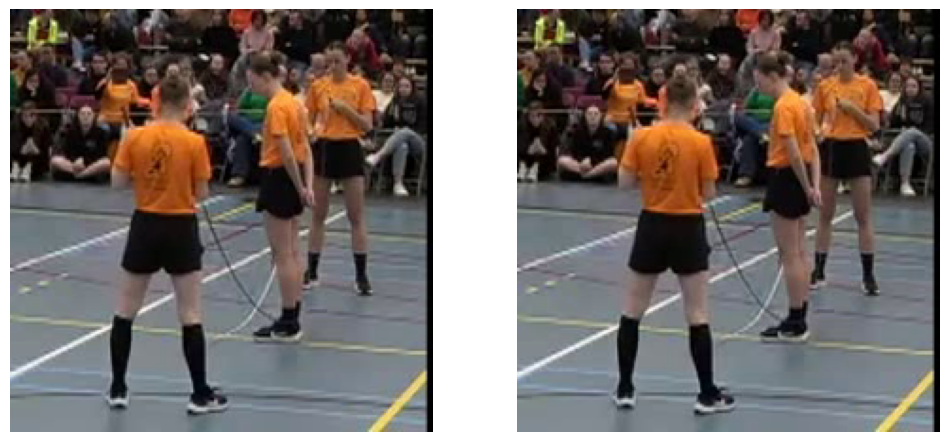

[0. 0.]


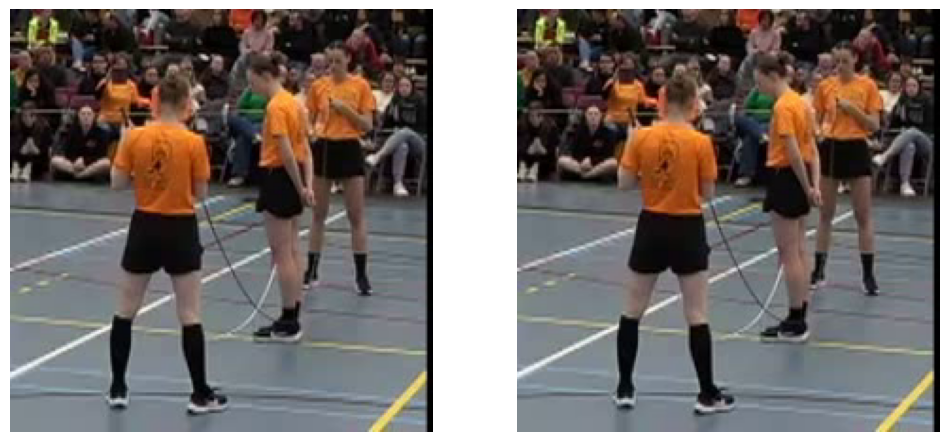

[0. 0.]


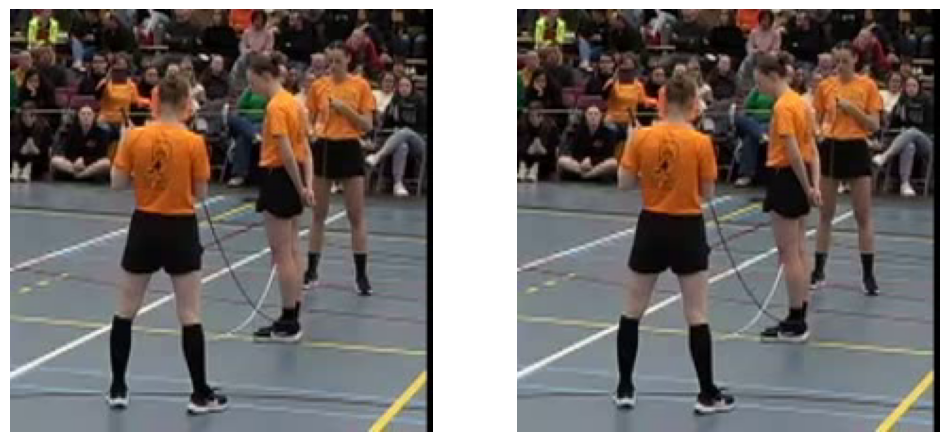

[0. 0.]


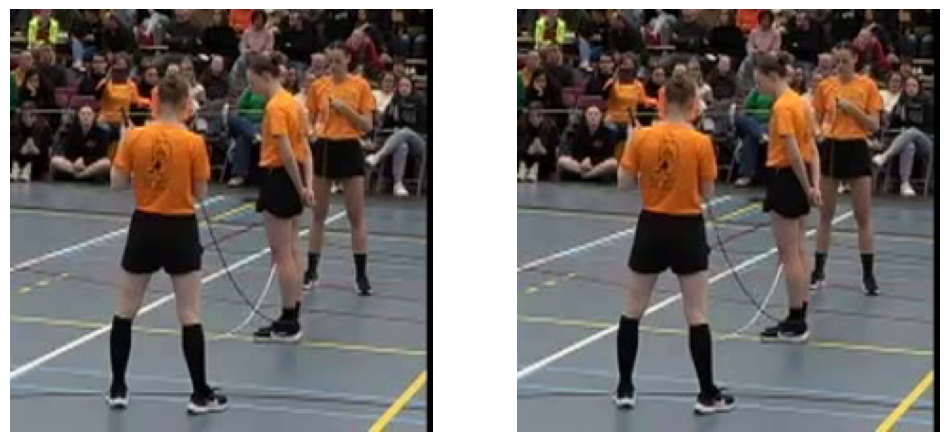

[0. 0.]


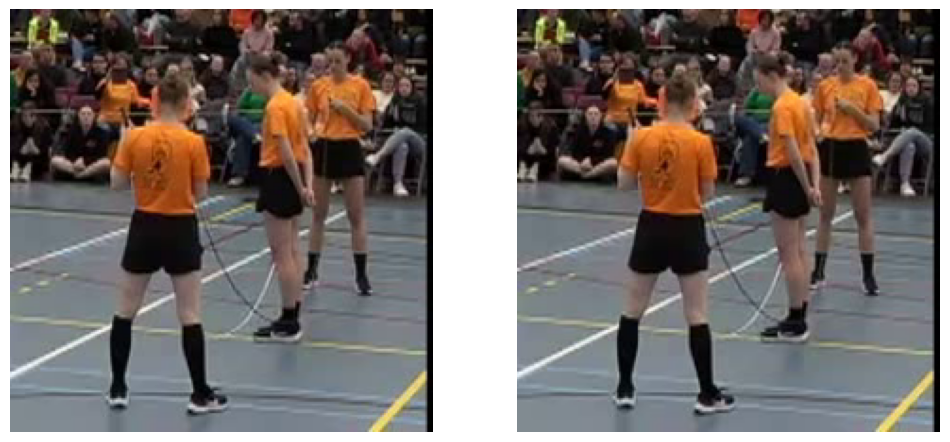

[0. 0.]


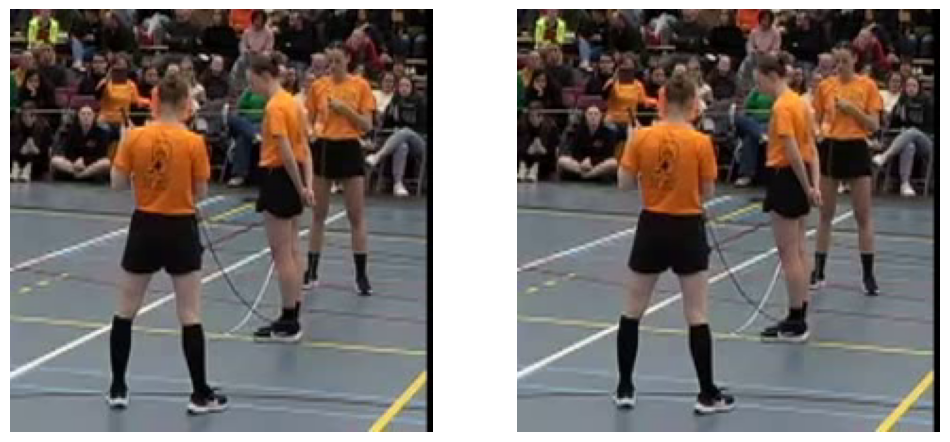

[0. 0.]


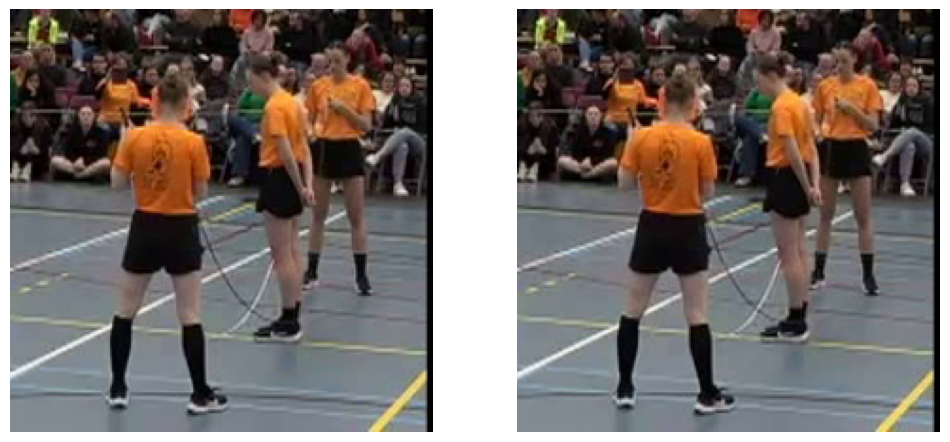

[0. 0.]


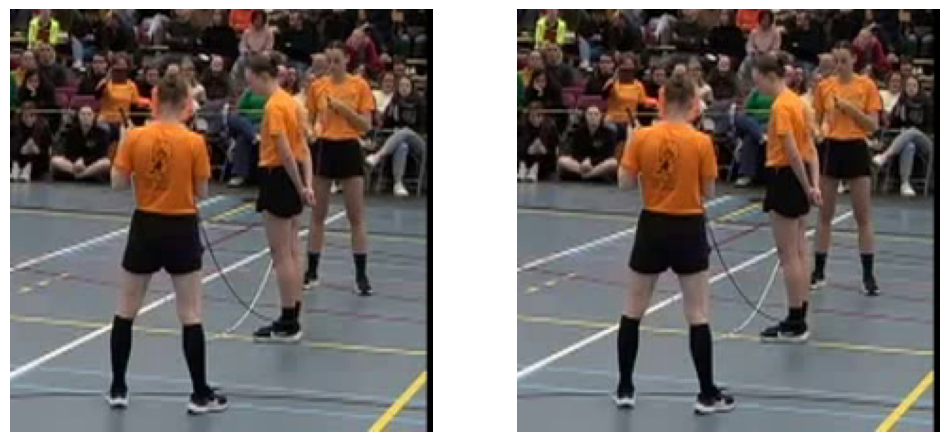

[0. 0.]


In [21]:
for j in range(X.shape[1]//2):
    plot(X[0, j*2:j*2+2])
    print(y[0, j*2:j*2+2])